# Model Evaluation

### Notebook Content

### Accuracy Metrics for Binary Classification
1. Cohen’s-kappa
2. Hamming-Loss
3. Confusion-Matrix
4. Precision-Recall-(PR)-Curve
5. ROC-(Receiver-Operating-Characteristics)
6. AUC-(Area-Under-the-Curve)

# Accuracy Metrics for Binary Classification

The True and Fake news classification dataset will be used to show how model evaluation for Binary Classification Can be done. The dataset can be downloaded from the link below:<br>
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [18]:
true = pd.read_csv(r'dataset/True.csv')
fake = pd.read_csv(r'dataset/fake.csv')

In [19]:
fake['target'] = 'fake'
true['target'] = 'true'
news = pd.concat([fake, true]).reset_index(drop = True)
print('The size of dataset',news.shape)

The size of dataset (44898, 5)


In [20]:
news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [21]:
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=2020)
# y_test_copy =y_test.copy()

In [22]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.05%


In [23]:
from sklearn.metrics import accuracy_score
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.05%


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Cohen’s kappa 

It is a statistic that **measures inter-annotator agreement**.

This function computes Cohen’s kappa, a **score that expresses the level of agreement between two annotators** on a classification problem. It is defined as:<<br>
$[\kappa = (p_o - p_e) / (1 - p_e)]$<br>
where  is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and  is the expected agreement when both annotators assign labels randomly.  is estimated using a per-annotator empirical prior over the class labels

In [24]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, prediction)


0.9810118237654452

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Hamming Loss
The hamming_loss computes the average Hamming loss or **Hamming distance between two sets of samples**.

If $hat{y}_j$ is the predicted value for the $j$-th label of a given sample, $y_j$ is the corresponding true value, and $n_text{labels}$ is the number of classes or labels, then the Hamming loss $L_{Hamming}$ between two samples is defined as:<br>
$L_{Hamming}(y, \hat{y}) = \frac{1}{n_\text{labels}} \sum_{j=0}^{n_\text{labels} - 1} 1(\hat{y}_j \not= y_j)$<br>
where $1(x)$ is the indicator function.



In [25]:
from sklearn.metrics import hamming_loss
hamming_loss(y_test, prediction)


0.009465478841870824

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>



# Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

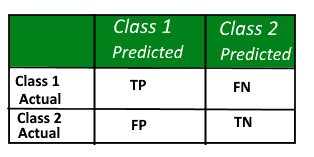

Here,

<br>Class 1 : Positive
<br>Class 2 : Negative

**Definition of the Terms:**

<br>Positive (P) : Observation is positive (for example: is an apple).
<br>Negative (N) : Observation is not positive (for example: is not an apple).
<br>True Positive (TP) : Observation is positive, and is predicted to be positive.
<br>False Negative (FN) : Observation is positive, but is predicted negative.
<br>True Negative (TN) : Observation is negative, and is predicted to be negative.
<br>False Positive (FP) : Observation is negative, but is predicted positive.

Text(0.5, 1, 'Confusion Matix')

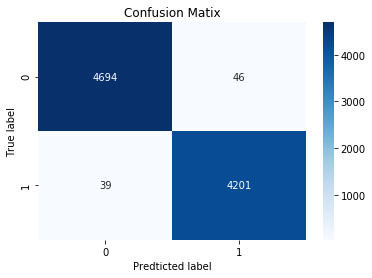

In [26]:
#using plot_confusion_matrix
from sklearn.metrics import confusion_matrix
table2=confusion_matrix(y_test, prediction)
#using seaborn
# fake = 0, true = 1
import seaborn as sns
ax = sns.heatmap(table2,annot=True,cmap='Blues', fmt='g')
ax.set(xlabel="Predticted label", ylabel = "True label")
ax.set_title('Confusion Matix')

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>



# Precision-Recall (PR) Curve
A PR curve is simply a graph with **Precision values on the y-axis and Recall values on the x-axis**. In other words, the PR curve contains TP/(TP+FN) on the y-axis and TP/(TP+FP) on the x-axis.

1. It is important to note that Precision is also called the Positive Predictive Value (PPV).
2. Recall is also called Sensitivity, Hit Rate or True Positive Rate (TPR).

Text(0.5, 1.0, '2-class Precision-Recall curve')

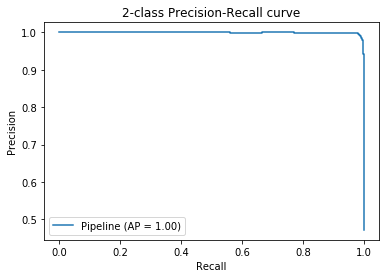

In [27]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(model, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>



# ROC (Receiver Operating Characteristics)

ROC Curves are used to see how well your classifier can separate positive and negative examples and to identify the best threshold for separating them.

In ROC curves, the true positive rate (TPR, y-axis) is plotted against the false positive rate (FPR, x-axis). These quantities are defined as follows:<br>
**TPR(True Positve Rate) = TP/(TP+FN)<br>
FPR(False Positve Rate) = FP/(TN+FP)**


In [28]:
pre = pd.Series(prediction)
y_test.replace(to_replace = 'true',value=1,inplace = True)
y_test.replace(to_replace = 'fake',value= 0,inplace = True)
pre.replace(to_replace = 'fake',value= 0,inplace = True,)
pre.replace(to_replace = 'true',value= 1,inplace = True)

In [29]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9905486227211209


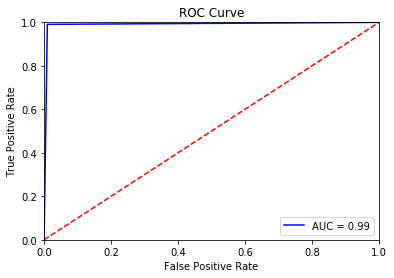

In [30]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>



# AUC (Area Under the Curve)
The model performance is determined by looking at the area under the ROC curve (or AUC). **An excellent model has AUC near to the 1.0**, which means it has a good measure of separability. For your model, the AUC is the combined are of the blue, green and purple rectangles,
<br>so the AUC = 0.4 x 0.6 + 0.2 x 0.8 + 0.4 x 1.0 = 0.80.

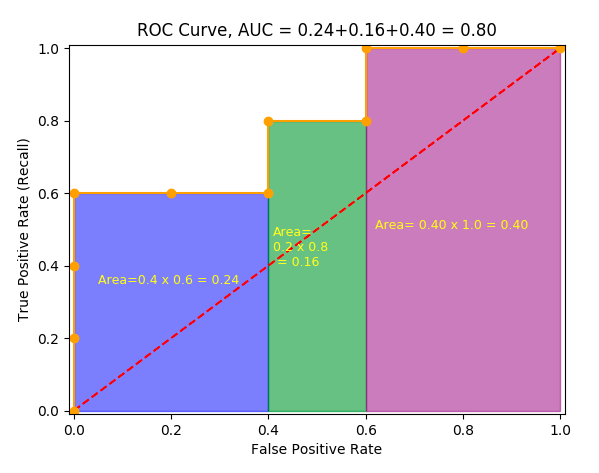

In [31]:
# AUC explaned in above illustration 
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9905486227211209
